# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(30)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

In [7]:
for val in data.columns.tolist():
    print(val, ':',  data[val].unique())

ID : [100097 101021 102965 ... 998425 999143 999194]
Subject : ['Por' 'Math']
school : ['GP' 'MS']
sex : ['F' 'M' 'm']
age : [16 17 18 15 19 21 20 22]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T' 't']
Medu : ['3' '1' '2' '4' '0' 'o']
Fedu : ['4' '2' '3' '1' 'o' '0']
Mjob : ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob : ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason : ['course' 'home' 'reputation' 'other']
guardian : ['father' 'mother' 'other' 'futher']
traveltime : [1 2 3 4]
studytime : [1 2 4 3]
failures : [0 2 1 3]
schoolsup : ['no' 'yes']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['yes' 'no']
romantic : ['no' nan 'yes']
famrel : [ 3.  5.  4.  1.  2. nan]
freetime : [2 3 4 1 5]
goout : [1 4 5 3 2]
Dalc : [ 1.  3.  4.  2.  5. nan]
Walc : [ 4.  3.  5.  1.  2. nan]
health : [5 3 4 2 1]
absences : [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 2

In [8]:
#удаление опечаток
data.loc[data['sex'] == 'm', 'sex'] = 'M'
data.loc[data['Pstatus'] == 't', 'Pstatus'] = 'T'
data.loc[data['Medu'] == 'o', 'Medu'] = '0'
data.loc[data['Fedu'] == 'o', 'Fedu'] = '0'
data.loc[data['Mjob'] == 'at-home', 'Mjob'] = 'at_home'
data.loc[data['Fjob'] == 'at-home', 'Fjob'] = 'at_home'
data.loc[data['guardian'] == 'futher', 'guardian'] = 'father'

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [9]:
#(количество строк, количество столбцов)
data.shape

(1044, 36)

In [10]:
nan_categor = ['romantic', 'famrel', 'Dalc', 'Walc', 'cheating'] #признаки с пропущенными значениями
for categ in nan_categor:
    print('Пропущенных значений в ', categ, ':', 1044 - data[categ].value_counts().sum())

Пропущенных значений в  romantic : 10
Пропущенных значений в  famrel : 10
Пропущенных значений в  Dalc : 10
Пропущенных значений в  Walc : 10
Пропущенных значений в  cheating : 700


In [11]:
#В cheeting можно заменить Nan на no, так как если не известно списывал или нет, значит не был пойман, значит можно считать,
#что не списывал.
#пропущенные значения в остальных категориях заменить нельзя (возможно с romantic можно поступить аналогично, но будем считать,
# что эти 10 учеников скрывают свою личную жизнь)
data['cheating'] = data['cheating'].fillna('no')

In [12]:
#удаляем остальные значения с Nan
data = data.dropna()

In [13]:
# заменим float64 на int64 в famrel, Dalc, Walc и str на int64 в Medu и Fedu
for val in ['famrel', 'Dalc', 'Walc', 'Medu', 'Fedu']:
    data[val] = data[val].astype('int64')

In [14]:
for val in data.columns.tolist():
    print(val, ':',  data[val].unique())

ID : [100097 101021 102965 ... 997832 997897 999143]
Subject : ['Por' 'Math']
school : ['GP' 'MS']
sex : ['F' 'M']
age : [16 17 18 15 19 21 20 22]
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Medu : [3 1 2 4 0]
Fedu : [4 2 3 1 0]
Mjob : ['services' 'other' 'health' 'teacher' 'at_home']
Fjob : ['other' 'services' 'health' 'at_home' 'teacher']
reason : ['course' 'home' 'reputation' 'other']
guardian : ['father' 'mother' 'other']
traveltime : [1 2 3 4]
studytime : [1 2 4 3]
failures : [0 2 1 3]
schoolsup : ['no' 'yes']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['yes' 'no']
romantic : ['no' 'yes']
famrel : [3 5 4 1 2]
freetime : [2 3 4 1 5]
goout : [1 4 5 3 2]
Dalc : [1 3 4 2 5]
Walc : [4 3 5 1 2]
health : [5 3 4 2 1]
absences : [12  2  0  4  6 10  7 20 14 11 24  8 16 21  1 18  5 22  9  3 15 26 25 54
 56 40 13 38 30 17 28 32 23 75]
cheating : ['no' 'yes']
G1 : [15 17  9 14 11 13  7 12 16  6

In [15]:
#перевод object в category
categor = data.columns[1:4].tolist() + data.columns[5:14].tolist() + data.columns[17:25].tolist() + ['cheating']
for col in categor:
    data[col] = data[col].astype('category')

In [16]:
data.head(5)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,no,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,no,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,no,14,15,16
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,no,11,11,12


### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [17]:
#gen_cols - признаки, по которым можно определить одного и того же студента
gen_cols = list(set(data.columns) - set(['ID', 'Subject', 'G1', 'G2', 'G3', 'cheating', 'paid', 'fretime', 'studytime']))
data_both_course = data[data.duplicated(gen_cols, keep=False)] # df с студентами, посещающих два курса
idxs_stud_both = data_both_course.groupby(gen_cols).apply(lambda x: tuple(x.index)).tolist()# лист из тюплов, а в тюпле индексы студента с двух курсов
print('Количество студентов, посещающих два курса', len(idxs_stud_both))

Количество студентов, посещающих два курса 77


In [18]:
data_both_course.groupby(['Subject'])[['G1', 'G2', 'G3']].describe()

G1                                                      G2  \
        count       mean       std  min   25%   50%   75%   max count   
Subject                                                                 
Math     77.0  12.155844  3.288997  6.0  10.0  12.0  14.0  19.0  77.0   
Por      77.0  12.753247  2.641550  5.0  11.0  13.0  14.0  19.0  77.0   

                                                             G3             \
              mean       std  min   25%   50%   75%   max count       mean   
Subject                                                                      
Math     12.285714  3.243849  5.0  10.0  12.0  15.0  19.0  77.0  11.948052   
Por      12.857143  2.563480  8.0  11.0  13.0  14.0  18.0  77.0  13.220779   

                                                
              std  min   25%   50%   75%   max  
Subject                                         
Math     4.480649  0.0  10.0  12.0  15.0  19.0  
Por      2.949681  0.0  11.0  13.0  15.0  19.0

Видно, что средние оценки почти не отличаются за первое, второе полугодия. Итоговая средняя по португальскому выше, чем по математике

<AxesSubplot:xlabel='Subject'>

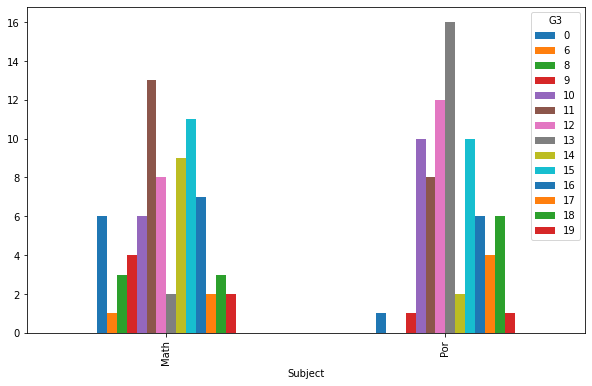

In [19]:
pd.crosstab(data_both_course['Subject'], data_both_course['G3']).plot.bar(figsize = (10,6))

**Вывод:** 
* по итоговой оценке видно, что у данных студентов язык идет лучше (у многих оценка 13)
* по математике больше людей, у которых итоговая 0, но так же чуть больше оценок 19

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

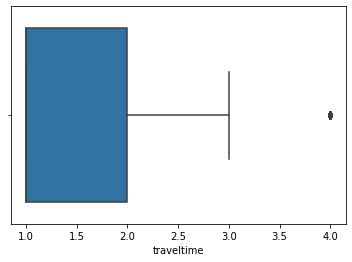

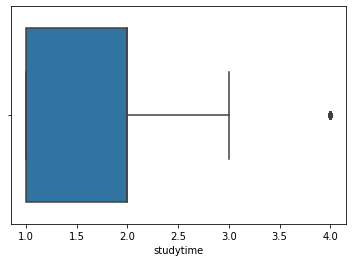

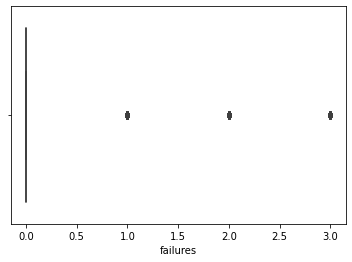

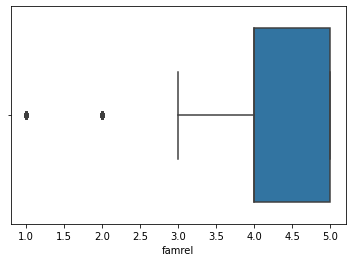

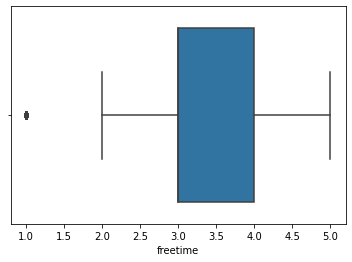

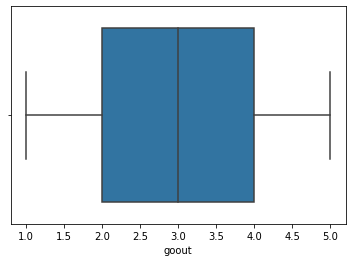

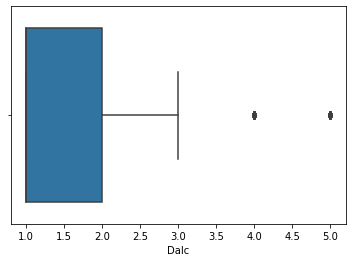

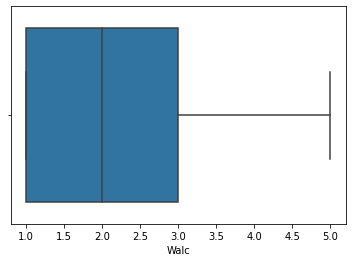

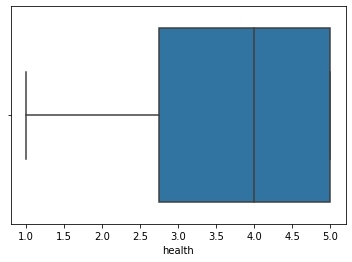

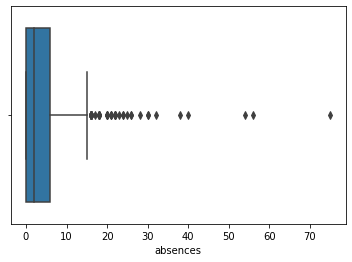

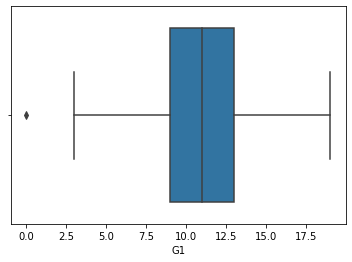

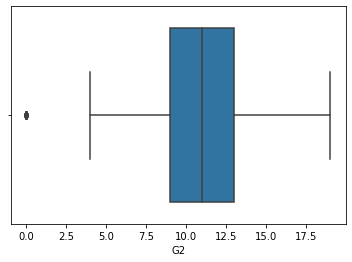

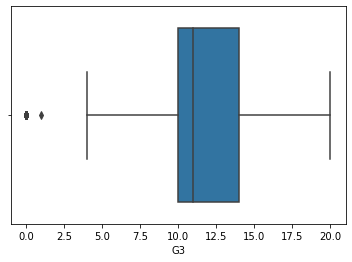

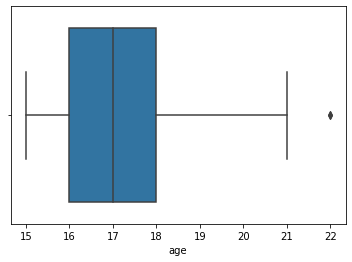

In [20]:
# ищем выбросы не в категориальных признаках
for cat in data.columns[14:17].tolist() + data.columns[25:32].tolist() + data.columns[33:36].tolist() + ['age']:
    sns.boxplot(x = cat, data = data)
    plt.show()

In [21]:
len(data[data['age'] ==22])

2

In [22]:
len(data[data['freetime'] == 1])

61

In [23]:
len(data[data['famrel'] < 3])

74

In [24]:
len(data[data['Dalc'] > 3])

51

In [25]:
len(data[data['failures'] == 3])

29

In [26]:
len(data[data['absences'] == 30])

2

In [27]:
print(len(data[data['G1'] < 2]), len(data[data['G2'] < 2]), len(data[data['G3'] < 2]))

1 19 52


**Вывод:** 
* считаю, что серьезные выбросы будут, если количество наблюдений меньше 20
* тогда, серьезные выбросы можно заметить только в age, absences, G1, G2
* если выбросами считать все точки, то большая часть датафрейма окажется выбросом

### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

#### Описательная статистика

In [28]:
# описательная статистика для числовых признаков
data.describe()

,ID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,548141.716135,16.741036,1.523904,1.973108,0.264940,3.937251,3.205179,3.163347,1.498008,2.286853,3.541833,4.477092,11.199203,11.232072,11.321713
std,264334.827908,1.240987,0.735394,0.841516,0.658956,0.934039,1.031765,1.157235,0.914596,1.289341,1.423084,6.244477,2.989206,3.287022,3.870419
min,100097.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,322884.500000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.750000,0.000000,9.000000,9.000000,10.000000
50%,557060.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,777665.000000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,999143.000000,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [29]:
#описательная статитсика для категориальных признаков
data.describe(include=['category'])

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,cheating
count,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
unique,2,2,2,2,2,2,5,5,5,5,4,3,2,2,2,2,2,2,2,2,2
top,Por,GP,F,U,GT3,T,4,2,other,other,course,mother,no,yes,no,no,yes,yes,yes,no,no
freq,624,740,565,729,712,890,292,312,387,557,416,700,894,611,789,509,801,917,794,638,835


#### Сколько студентов посещают каждую из школ?

In [30]:
#с учетом дубликатов
data['school'].value_counts()

GP    740
MS    264
Name: school, dtype: int64

In [31]:
#только дубликаты
data_both_course['school'].value_counts()/2

GP    66.0
MS    11.0
Name: school, dtype: float64

In [32]:
for val in data['school'].unique():
    print(val, 'посещает', data['school'].value_counts()[val] - data_both_course['school'].value_counts()[val]/2)

GP посещает 674.0
MS посещает 253.0


#### Сколько студентов посещают португальский и математику?

In [33]:
#с учетом дубликатов
data['Subject'].value_counts()
for val in data['Subject'].unique():
    print(val, 'посещает', data['Subject'].value_counts()[val])

Por посещает 624
Math посещает 380


#### Студенты какого курса чаще валят экзамены?

In [34]:
data.groupby('Subject')['failures'].mean()

Subject
Math    0.336842
Por     0.221154
Name: failures, dtype: float64

**Вывод:** чаще валят математику

##### Сколько в среднем уходит на учебу по каждому предмету?

In [35]:
data.groupby('Subject')['studytime'].mean()

Subject
Math    2.039474
Por     1.932692
Name: studytime, dtype: float64

**Вывод:** по каждому предмету от 2 до 5 часов в среднем

#### На что чаще обращают внимание при выборе школы?

In [36]:
for val in data['reason'].unique():
    print(val, 'важно', data['reason'].value_counts()[val] - data_both_course['reason'].value_counts()[val]/2 ) #делим на два, чтобы выбросить дубликаты

course важно 386.0
home важно 224.0
reputation важно 217.0
other важно 100.0


**Вывод:** в первую очередь важен курс, затем близость к дому и репутация 

### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

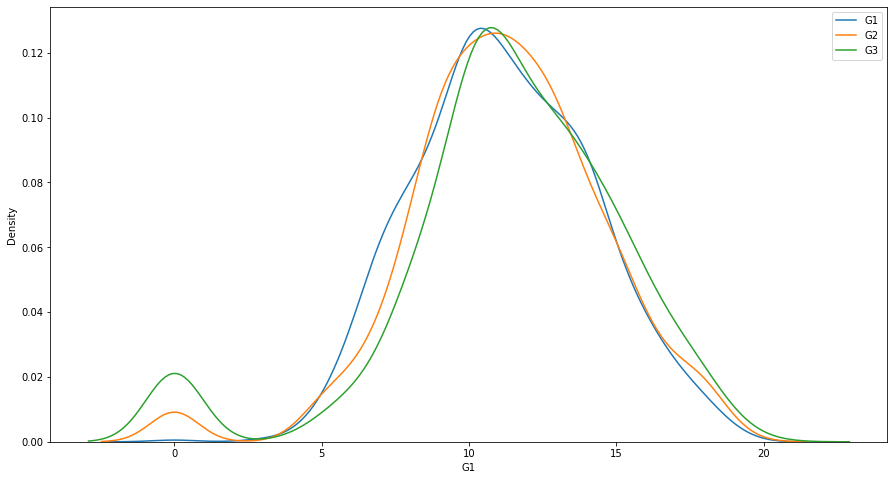

In [37]:
#использовал kdeplot вместо distplot, потому что ругались за использование distplot, мол старая уже функция
# распределение в целом
plt.figure(figsize=(15, 8))
sns.kdeplot(data=data, x="G1", label = 'G1')
sns.kdeplot(data=data, x="G2", label = 'G2')
sns.kdeplot(data=data, x="G3", label = 'G3')
plt.legend(loc='best')
plt.show()

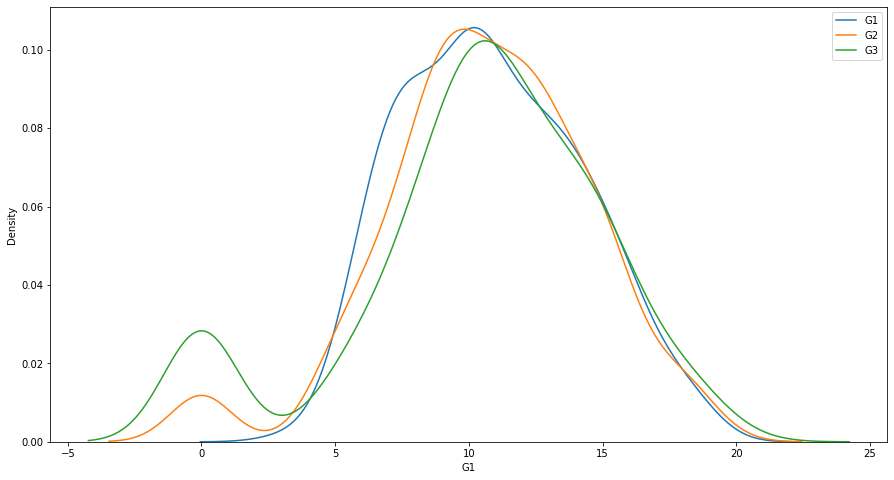

In [38]:
#распределение для математики
plt.figure(figsize=(15, 8))
sns.kdeplot(data[data['Subject'] == 'Math']['G1'], x = 'G1', label = 'G1')
sns.kdeplot(data[data['Subject'] == 'Math']['G2'], x = 'G2', label = 'G2')
sns.kdeplot(data[data['Subject'] == 'Math']['G3'], x = 'G3', label = 'G3')
plt.legend(loc='best')
plt.show()

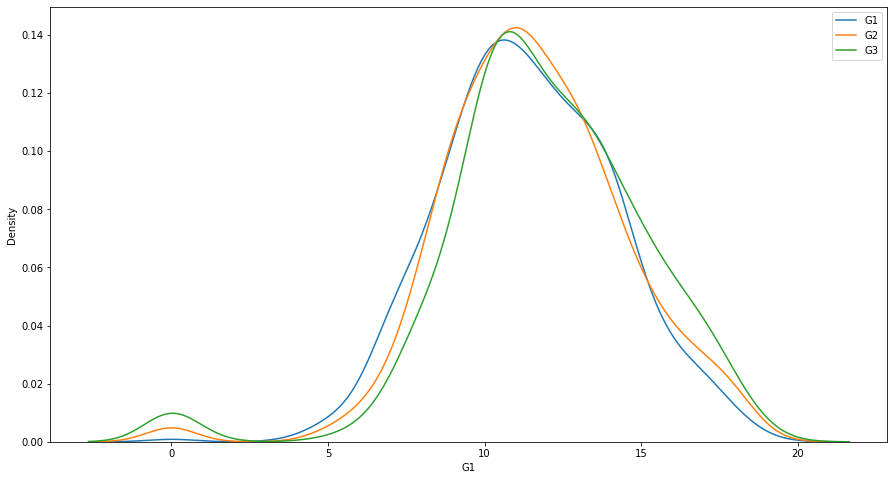

In [39]:
#распределение для португальского
plt.figure(figsize=(15, 8))
sns.kdeplot(data[data['Subject'] == 'Por']['G1'], x = 'G1', label = 'G1')
sns.kdeplot(data[data['Subject'] == 'Por']['G2'], x = 'G2', label = 'G2')
sns.kdeplot(data[data['Subject'] == 'Por']['G3'], x = 'G3', label = 'G3')
plt.legend(loc='best')
plt.show()

boxplot ниже просто для красоты и успокоения души (подверждает границы основных значений и выбросы)

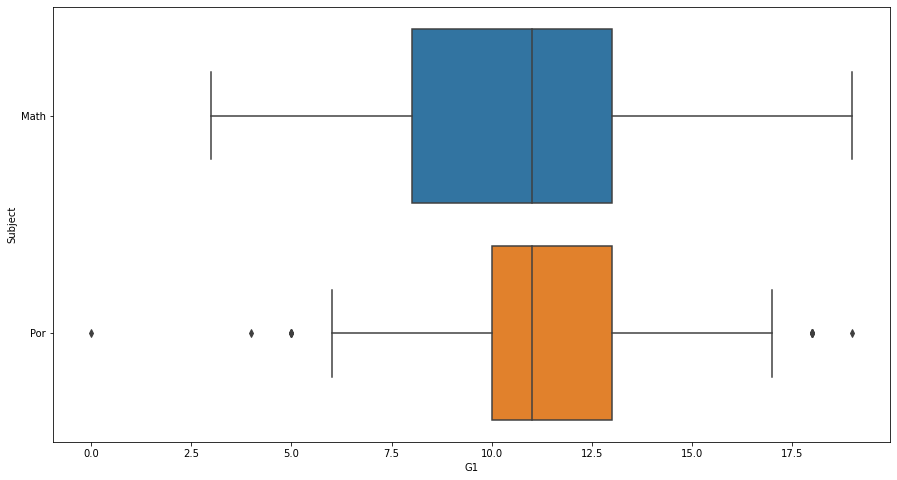

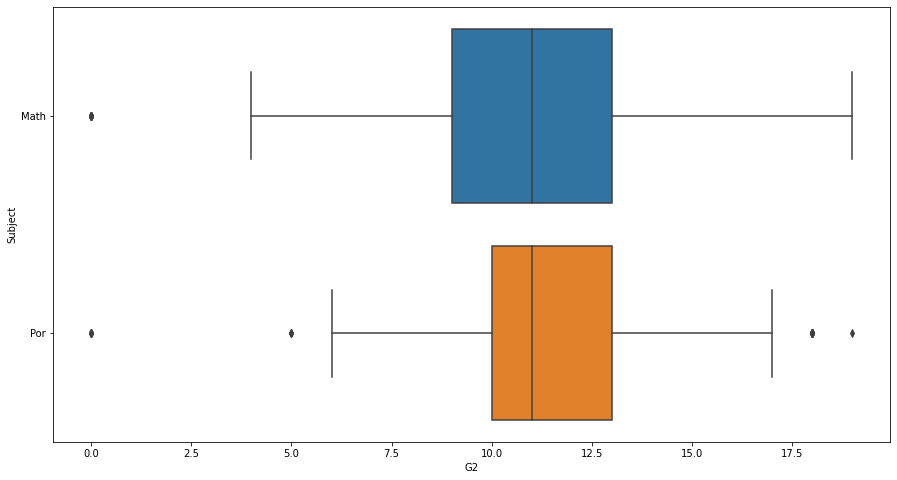

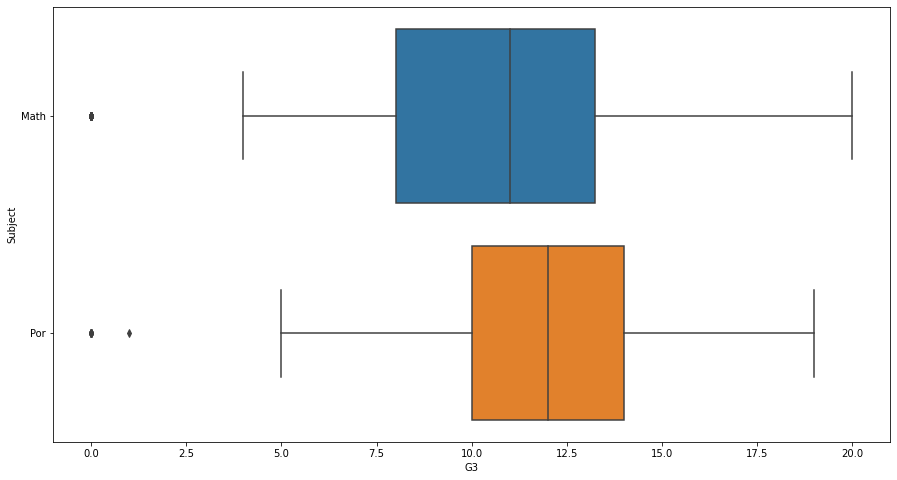

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(y="Subject", x="G1", data=data, orient="h")
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(y="Subject", x="G2", data=data, orient="h")
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(y="Subject", x="G3", data=data, orient="h")
plt.show()

**Вывод:** промежутки основных значений примерно одинаковые (от 10 до 12), оценка 0, думаю, можно рассматривать как выброс или просто это слабое звено школы. В G1 и G2 медианы по разным предметам совпадают.

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

In [41]:
corr_mat = data.corr()
corr_mat

,ID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
ID,1.000000,0.010251,0.006719,0.038751,0.008118,0.037477,0.040389,-0.042988,-0.026872,-0.071689,-0.004739,-0.042343,0.041007,0.016003,0.008107
age,0.010251,1.000000,0.041749,-0.005721,0.280275,0.009191,-0.002066,0.114182,0.126916,0.091959,-0.033943,0.141272,-0.118582,-0.112837,-0.117976
traveltime,0.006719,0.041749,1.000000,-0.085153,0.083616,-0.015958,0.000099,0.051641,0.115694,0.087396,-0.033348,-0.023654,-0.130522,-0.150575,-0.112519
studytime,0.038751,-0.005721,-0.085153,1.000000,-0.152551,0.006730,-0.088948,-0.070222,-0.150985,-0.222608,-0.054424,-0.073259,0.211405,0.181398,0.158775
failures,0.008118,0.280275,0.083616,-0.152551,1.000000,-0.047476,0.104736,0.076550,0.115023,0.108778,0.055150,0.093791,-0.371008,-0.373639,-0.382542
famrel,0.037477,0.009191,-0.015958,0.006730,-0.047476,1.000000,0.135450,0.077749,-0.077758,-0.104253,0.104362,-0.063408,0.033049,0.035273,0.052474
freetime,0.040389,-0.002066,0.000099,-0.088948,0.104736,0.135450,1.000000,0.327620,0.142011,0.128090,0.078348,-0.033778,-0.050441,-0.065206,-0.057242
goout,-0.042988,0.114182,0.051641,-0.070222,0.076550,0.077749,0.327620,1.000000,0.250878,0.398221,-0.021710,0.049221,-0.099340,-0.107216,-0.092770
Dalc,-0.026872,0.126916,0.115694,-0.150985,0.115023,-0.077758,0.142011,0.250878,1.000000,0.630366,0.062878,0.127167,-0.146092,-0.126698,-0.125858
Walc,-0.071689,0.091959,0.087396,-0.222608,0.108778,-0.104253,0.128090,0.398221,0.630366,1.000000,0.095608,0.129108,-0.141598,-0.123703,-0.110614


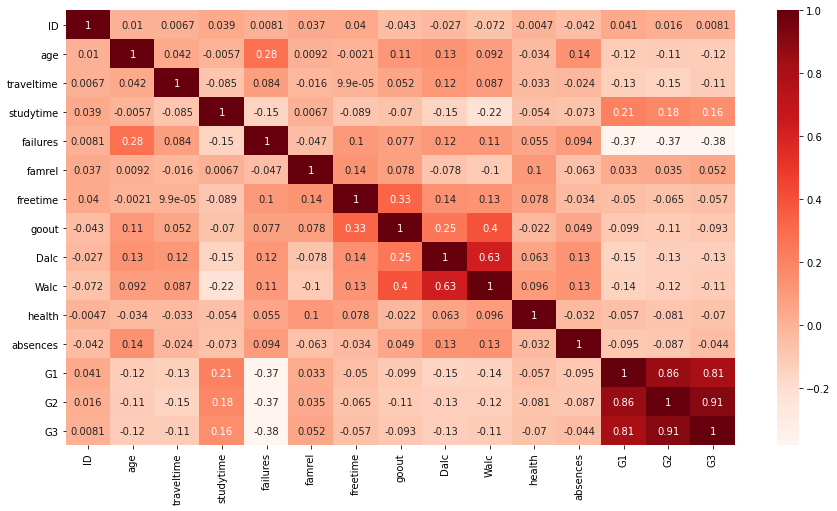

In [42]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr_mat, annot=True, cmap = 'Reds')
plt.ylim((corr_mat.shape[0], 0))
plt.show()

Высокая корреляция: 
* G1, G2, G3 между собой 
* у Walc и Dalc
* failures с age, G1, G2, G3, меньше с freetime, Dalc и Walc.
* studytime c G1, G2, G3 (связь вполне ясна).
* goout с freetime и Walc, меньше с Dalc.

Поиск связи:
* Логична зависимость G1, G2 и G3 друг с другом (если хорошо учился, то вряд ли возьмет и отупеет).
* Walc и Dalc также логична так как если пил в будни, то можно и в выходные подбухнуть :)
* failures с age можно связать, так как молодые люди могут быть менее уверены в себе; если пьешь много, то и провалы наверное выше.
* goout с Walc связано тем, что когда еще сходить бухнуть с друзьями, кроме выходных
* забавно видеть небольшую связь absences с Walc и Dalc (пропускал, потому что выпивал) 

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

In [43]:
# categor - список с категориальными признаками
data_cat = data.copy()[categor]
data_cat.head()

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,cheating
0,Por,GP,F,U,GT3,A,3,4,services,other,course,father,no,no,no,no,yes,yes,yes,no,no
1,Por,GP,F,U,GT3,T,3,2,other,other,course,mother,no,no,no,yes,no,yes,yes,no,no
2,Por,GP,M,U,LE3,T,1,2,health,services,course,mother,no,no,no,no,no,yes,yes,no,yes
3,Por,MS,M,U,GT3,T,2,3,other,services,home,father,no,no,no,yes,yes,yes,yes,no,no
5,Por,GP,M,U,LE3,T,3,1,services,services,course,mother,no,no,no,yes,yes,yes,yes,yes,no


In [44]:
for val in categor:
    le = preprocessing.LabelEncoder().fit(data_cat[val].unique())
    data_cat[val] = le.transform(data_cat[val].tolist())
data_cat.head()

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,cheating
0,1,0,0,1,0,0,3,4,3,2,0,0,0,0,0,0,1,1,1,0,0
1,1,0,0,1,0,1,3,2,2,2,0,1,0,0,0,1,0,1,1,0,0
2,1,0,1,1,1,1,1,2,1,3,0,1,0,0,0,0,0,1,1,0,1
3,1,1,1,1,0,1,2,3,2,3,1,0,0,0,0,1,1,1,1,0,0
5,1,0,1,1,1,1,3,1,3,3,0,1,0,0,0,1,1,1,1,1,0


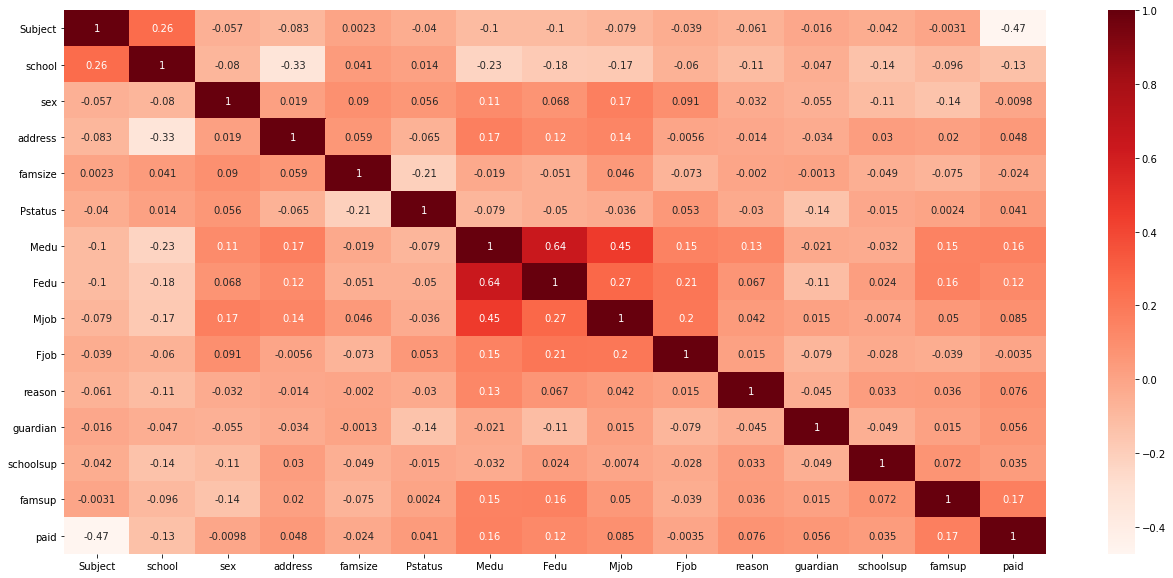

In [45]:
plt.figure(figsize=(22, 10))
sns.heatmap(data_cat[data_cat.columns[0:15].tolist()].corr(), annot=True, cmap = 'Reds')
plt.ylim((corr_mat.shape[0], 0))
plt.show()


В heatmap влезли не все критерии (функции выдерживает только 16), поэтому остальные придется просматривать в матрице ниже.

In [46]:
data_cat.corr()[15:] # здесь не такие высокие корреляци, но пусть будет

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,cheating
activities,-0.023205,-0.095754,0.122738,-0.028668,-0.008616,0.101760,0.120407,0.093011,0.100704,0.026852,0.096703,0.007039,-0.001487,-0.000980,0.033990,1.000000,0.035142,0.055898,0.061405,0.039537,-0.012362
nursery,0.005969,-0.026034,-0.036185,0.041136,0.103968,-0.047289,0.149013,0.106356,0.060932,-0.039036,0.057476,-0.052667,0.033673,0.038305,0.051210,0.035142,1.000000,0.047684,0.003292,-0.005142,0.040897
higher,-0.094373,-0.129667,-0.078219,0.072802,0.002360,0.001356,0.213052,0.199673,0.138536,0.049522,0.082891,-0.075538,0.074039,0.079396,0.126267,0.055898,0.047684,1.000000,0.067923,-0.105079,0.025023
internet,-0.078173,-0.221294,0.058368,0.200327,0.000408,0.070671,0.252542,0.166911,0.248212,0.076265,0.083607,-0.024714,-0.015619,0.094325,0.125186,0.061405,0.003292,0.067923,1.000000,0.053700,-0.004264
romantic,0.036378,0.078789,-0.108609,-0.026687,-0.002033,-0.048544,-0.006553,-0.038732,-0.072162,0.004891,-0.017377,0.105487,-0.080166,0.001123,-0.027122,0.039537,-0.005142,-0.105079,0.053700,1.000000,0.018763
cheating,-0.027640,0.015491,0.000561,0.007699,0.034282,-0.065538,0.047903,0.029561,-0.004000,-0.012485,-0.029496,-0.037461,0.029694,0.006285,0.050679,-0.012362,0.040897,0.025023,-0.004264,0.018763,1.000000


**Вывод:**
* Subject больше всего зависит от school (наверное в какой-то школе лучше преподают язык или матешу) и paid(думаю, по некоторым предметам нужна помощь, а по другим нет)
* School связано с address(логично нужно выбрать школу ближе к дому), Medu и меньше с Fedu (мать видимо главнее в семье или ребенок ориентируется на мать)
* Странно видеть связь Sex с Mjob и Medu
* Довольно сильно зависят Medu с Fedu (возможно познакомились во время учебы), Mjob(работа то зависит от образования) и меньше с Fjob(логично, что у родителей может быть совершенно разные профессии). Таким образом, Medu, Fedu, Mjob, Fjob имеют связь.
* Также, логична связь paid и famsup (зачем платить кому-то, если тебе дома могут помочь)

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

#### Есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?

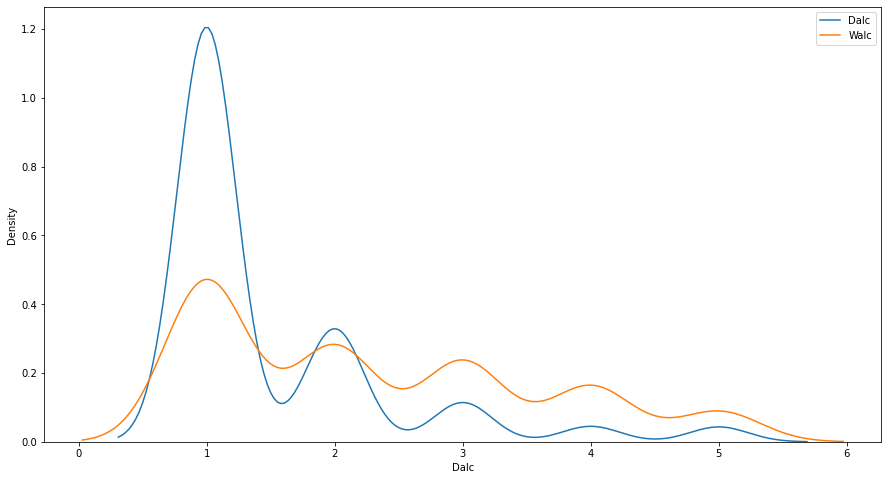

In [47]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data['Walc'], x = 'Walc', label = 'Walc')
plt.legend(loc='best')
plt.show()

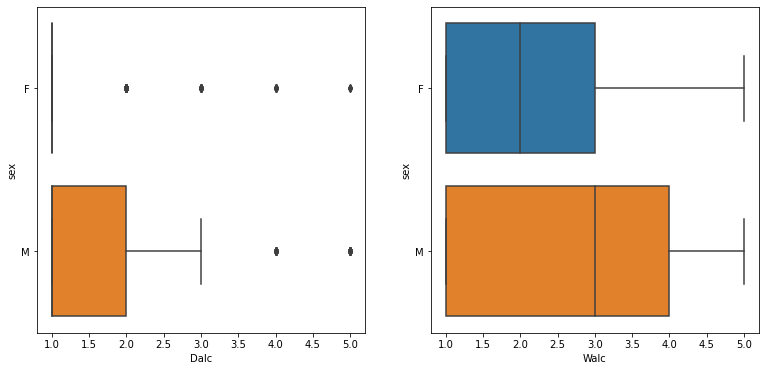

In [48]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y="sex", x="Dalc", data=data, orient="h")
plt.subplot(1, 3, 2)
sns.boxplot(y="sex", x="Walc", data=data, orient="h")
plt.show()

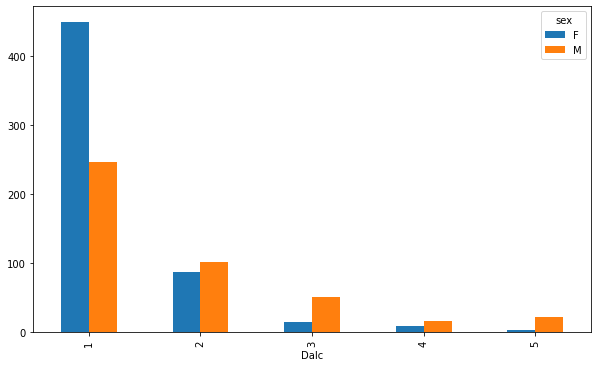

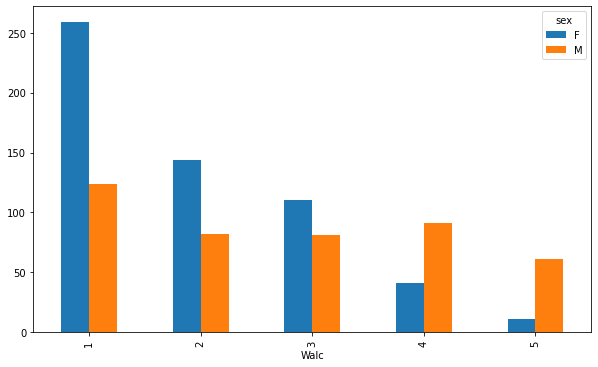

In [49]:
pd.crosstab(data['Dalc'], data['sex']).plot.bar(figsize=(10,6))
pd.crosstab(data['Walc'], data['sex']).plot.bar(figsize=(10,6))
plt.show()

**Вывод:** 
* Большинство женщин пьют очень мало в будни дни и очень мало, мало и умеренно в выходные. Можно сделать вывод, что женщины пьют меньше.
* Есть женщины, пьющие умеренно и много в выходные (около 200)
* Большая часть мужчин предпочитают пить в выходные дни и распределение примерно равномерное (на каждый уровень потребления алкоголя примерно равное количество мужчин)
* В целом, людей, кто пьет в будние дни больше чем умеренно, почти нет
* по boxplot можно сказать, что мужчины потребляют больше алкоголя, чем женщины и в будни и в выходные

#### Связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime.

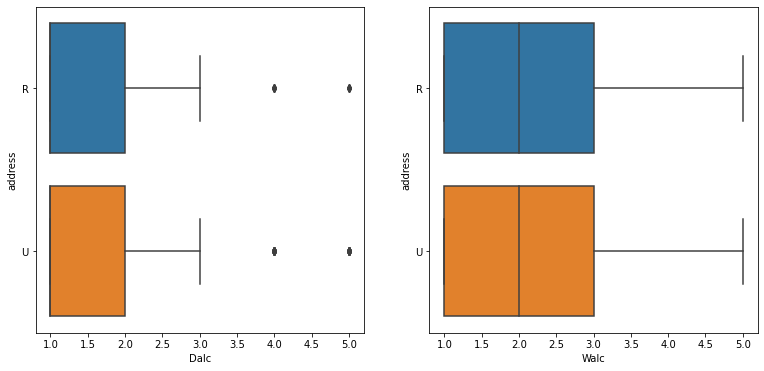

In [50]:
#address
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y="address", x="Dalc", data=data, orient="h")
plt.subplot(1, 3, 2)
sns.boxplot(y="address", x="Walc", data=data, orient="h")
plt.show()

In [51]:
data.groupby(['address'])[['Dalc', 'Walc']].mean()

,Dalc,Walc
address,,
R,1.585455,2.381818
U,1.465021,2.251029


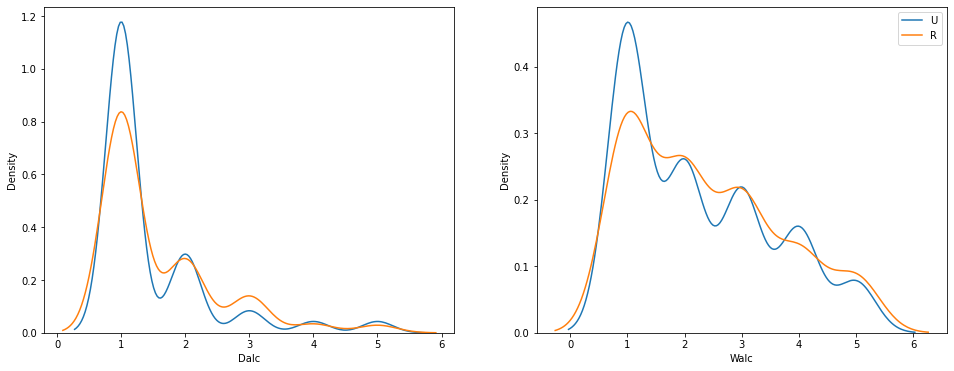

In [52]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(data[data['address'] == 'U']['Dalc'], x = 'Dalc', label = 'U')
sns.kdeplot(data[data['address'] == 'R']['Dalc'], x = 'Dalc', label = 'R')
plt.subplot(1, 3, 2)
sns.kdeplot(data[data['address'] == 'U']['Walc'], x = 'Walc', label = 'U')
sns.kdeplot(data[data['address'] == 'R']['Walc'], x = 'Walc', label = 'R')
plt.legend(loc='best')
plt.show()

**Вывод:** 
* судя по boxplot, распределение алкоголя для города U и R ничем не отличается. 
* График плотности показывает, что более менее серьезная разница есть в колчестве людей, пьющих мало - в городе U их чуть больше. В остальном, уровень потребления алкоголя очень схож.
* Среднее число показывает, в городе R уровень алкоголя чуть выше (совсем несерьезно)

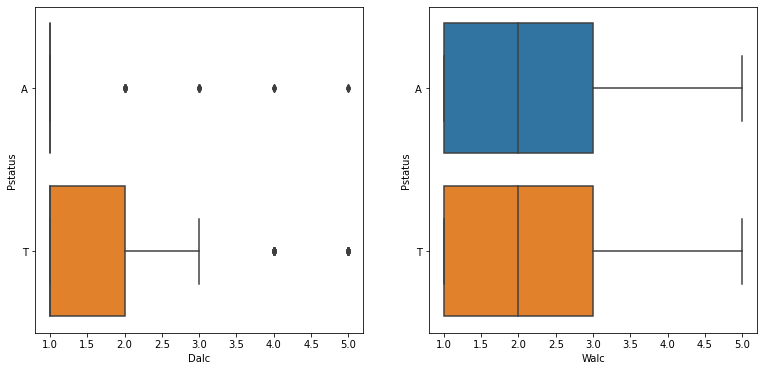

In [53]:
#Pstatus
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y="Pstatus", x="Dalc", data=data, orient="h")
plt.subplot(1, 3, 2)
sns.boxplot(y="Pstatus", x="Walc", data=data, orient="h")
plt.show()

In [54]:
data.groupby(['Pstatus'])[['Dalc', 'Walc']].mean()

,Dalc,Walc
Pstatus,,
A,1.447368,2.114035
T,1.504494,2.308989


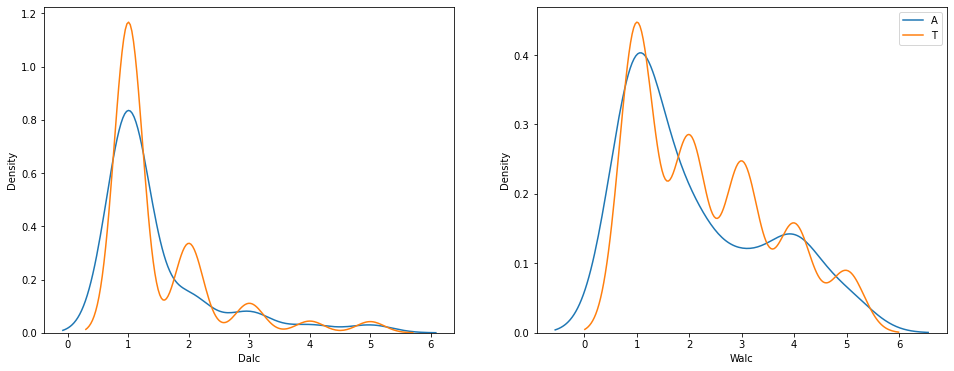

In [55]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(data[data['Pstatus'] == 'A']['Dalc'], x = 'Dalc', label = 'A')
sns.kdeplot(data[data['Pstatus'] == 'T']['Dalc'], x = 'Dalc', label = 'T')
plt.subplot(1, 3, 2)
sns.kdeplot(data[data['Pstatus'] == 'A']['Walc'], x = 'Walc', label = 'A')
sns.kdeplot(data[data['Pstatus'] == 'T']['Walc'], x = 'Walc', label = 'T')
plt.legend(loc='best')
plt.show()

**Вывод:** 
* По boxplot можно сказать, что если семья живет вместе, то уровень потребления алкоголя в будни в основном очень низкое или низкое. Если родители разведены, то данные сильно разбросаны (нельзя сказать где большинство)
* По boxplot видно, что уровень потребления алкоголя в выходные дни не зависит от статуса семьи
* По графику плотности видно, что если семья живет вместе, то скорее всего ученик пьет очень мало или мало в будни, в выходные пьет очень мало, мало или умеренно.
* Среднее число показывает, что если живут вместе, то пьют чуть больше (разница несерьезная)
* Серьезеной зависимости уровня алкоголя и статуса семьи я не вижу

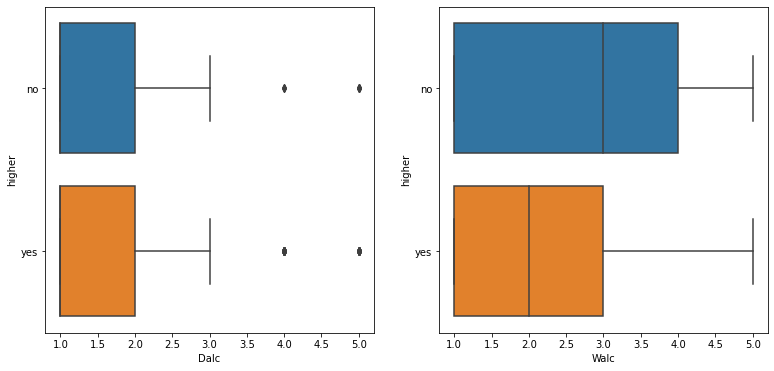

In [56]:
#higher (собираетс ли получать высшее образование)
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y="higher", x="Dalc", data=data, orient="h")
plt.subplot(1, 3, 2)
sns.boxplot(y="higher", x="Walc", data=data, orient="h")
plt.show()

In [57]:
data.groupby(['higher'])[['Dalc', 'Walc']].mean()

,Dalc,Walc
higher,,
no,1.816092,2.643678
yes,1.467830,2.252999


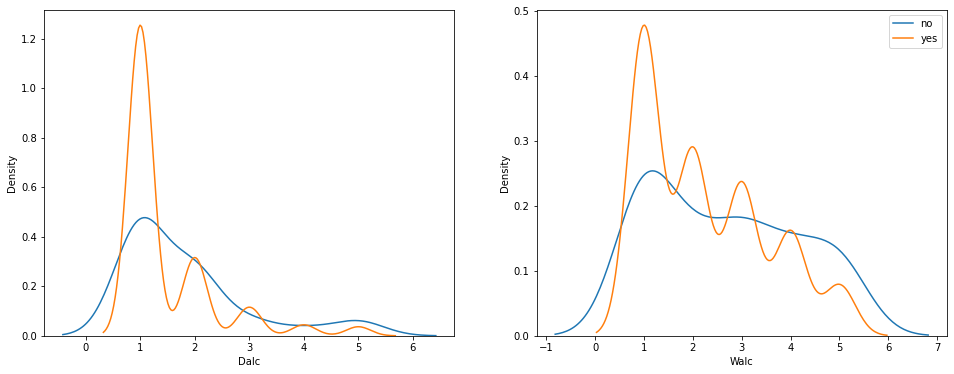

In [58]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(data[data['higher'] == 'no']['Dalc'], x = 'Dalc', label = 'no')
sns.kdeplot(data[data['higher'] == 'yes']['Dalc'], x = 'Dalc', label = 'yes')
plt.subplot(1, 3, 2)
sns.kdeplot(data[data['higher'] == 'no']['Walc'], x = 'Walc', label = 'no')
sns.kdeplot(data[data['higher'] == 'yes']['Walc'], x = 'Walc', label = 'yes')
plt.legend(loc='best')
plt.show()

**Вывод:**
* По boxplot можно сказать, что у желающих получить высшее образование, уровень потребления алкоголя в выходные дни меньше
* По графикам плотности видно, что среди нежелающих получать вышку, есть большое число людей пьщих больше чем умеренно и в будни и в выходные
* Среднее число говорит, что дейтсвительно люди нежелающие высшее образование, пьют больше.

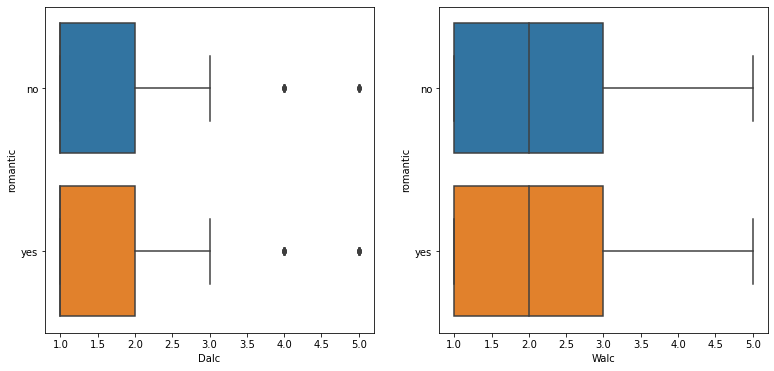

In [59]:
#romantic
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y="romantic", x="Dalc", data=data, orient="h")
plt.subplot(1, 3, 2)
sns.boxplot(y="romantic", x="Walc", data=data, orient="h")
plt.show()

In [60]:
data.groupby(['romantic'])[['Dalc', 'Walc']].mean()

,Dalc,Walc
romantic,,
no,1.463950,2.299373
yes,1.557377,2.265027


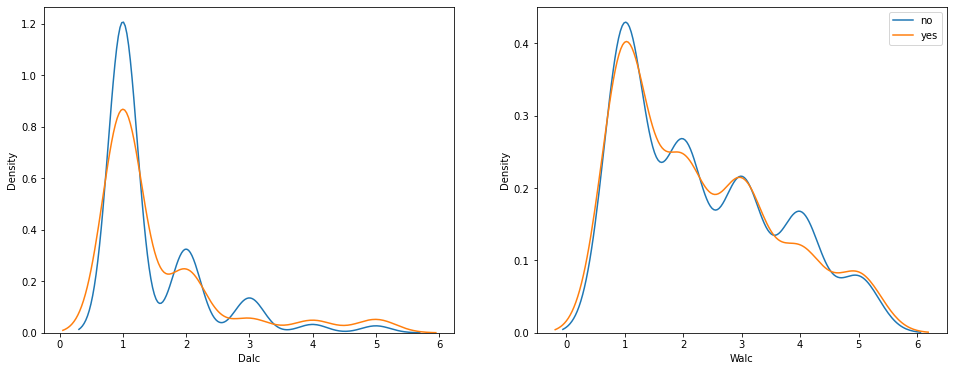

In [61]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(data[data['romantic'] == 'no']['Dalc'], x = 'Dalc', label = 'no')
sns.kdeplot(data[data['romantic'] == 'yes']['Dalc'], x = 'Dalc', label = 'yes')
plt.subplot(1, 3, 2)
sns.kdeplot(data[data['romantic'] == 'no']['Walc'], x = 'Walc', label = 'no')
sns.kdeplot(data[data['romantic'] == 'yes']['Walc'], x = 'Walc', label = 'yes')
plt.legend(loc='best')
plt.show()

**Вывод:**
* boxplot одинаковы и по ним сказать нечего
* среднее значение показывает, что если ты состоишь в романтических отношениях, то то пьешь чуть больше в будни, а если не состоишь, то чуть больше в выходные (но разницы почти нет, это десятые части)
* по графику плотности видно, что разницы почти нет, граифики идентичны. Можно только сказать, что школьников в романтических отношениях, которые пьют очень много больше, чем школьников не в романтических отношениях, пьющих так же очень много. 

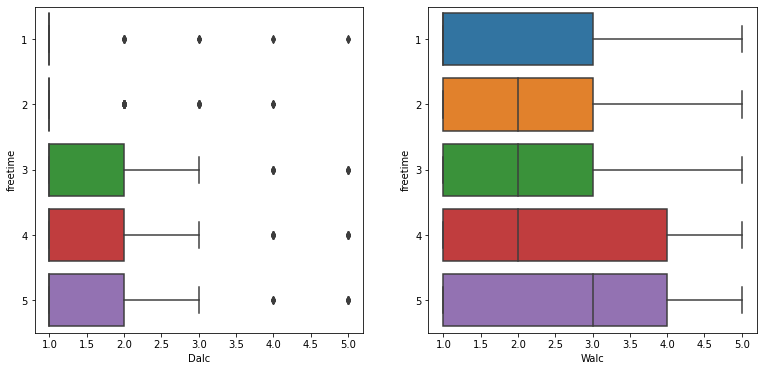

In [62]:
#freetime
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y="freetime", x="Dalc", data=data, orient="h")
plt.subplot(1, 3, 2)
sns.boxplot(y="freetime", x="Walc", data=data, orient="h")
plt.show()

In [63]:
data.groupby(['freetime'])[['Dalc', 'Walc']].mean()

,Dalc,Walc
freetime,,
1,1.475410,2.032787
2,1.323171,2.164634
3,1.390306,2.165816
4,1.645390,2.450355
5,1.790476,2.638095


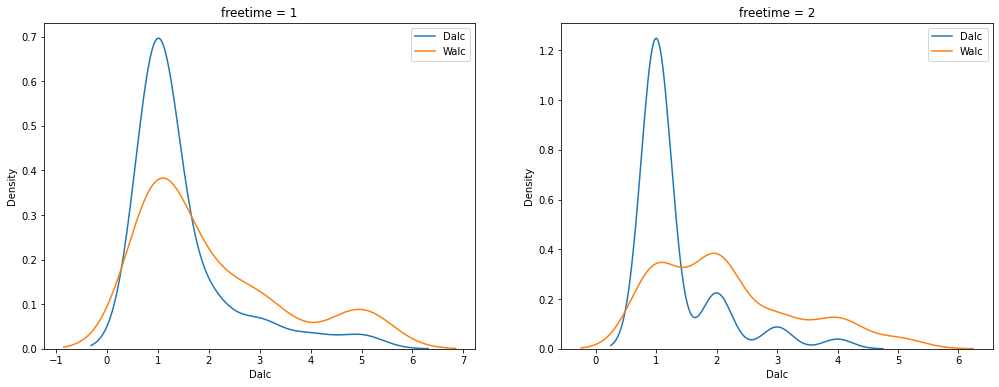

In [64]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data[data['freetime'] == 1]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data[data['freetime'] == 1]['Walc'], x = 'Walc', label = 'Walc')
plt.title("freetime = 1")
plt.legend(loc='best')
plt.subplot(1, 2, 2)
sns.kdeplot(data[data['freetime'] == 2]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data[data['freetime'] == 2]['Walc'], x = 'Walc', label = 'Walc')
plt.title("freetime = 2")
plt.legend(loc='best')
plt.show()

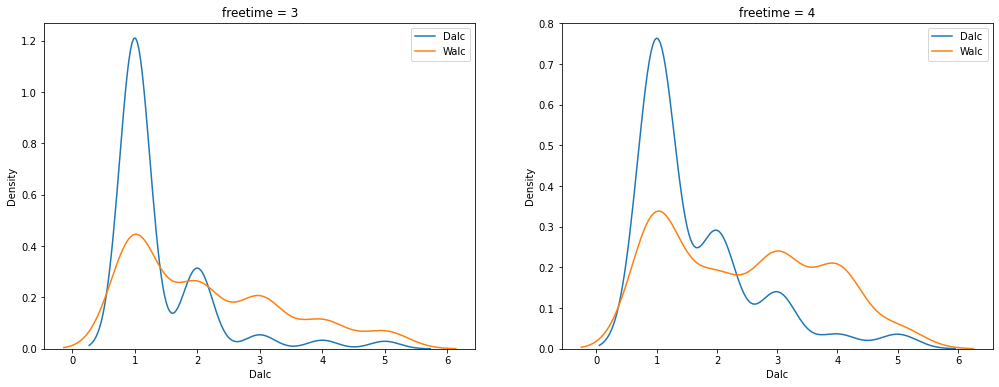

In [65]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data[data['freetime'] == 3]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data[data['freetime'] == 3]['Walc'], x = 'Walc', label = 'Walc')
plt.title("freetime = 3")
plt.legend(loc='best')

plt.subplot(1, 2, 2)
sns.kdeplot(data[data['freetime'] == 4]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data[data['freetime'] == 4]['Walc'], x = 'Walc', label = 'Walc')
plt.title("freetime = 4")
plt.legend(loc='best')
plt.show()

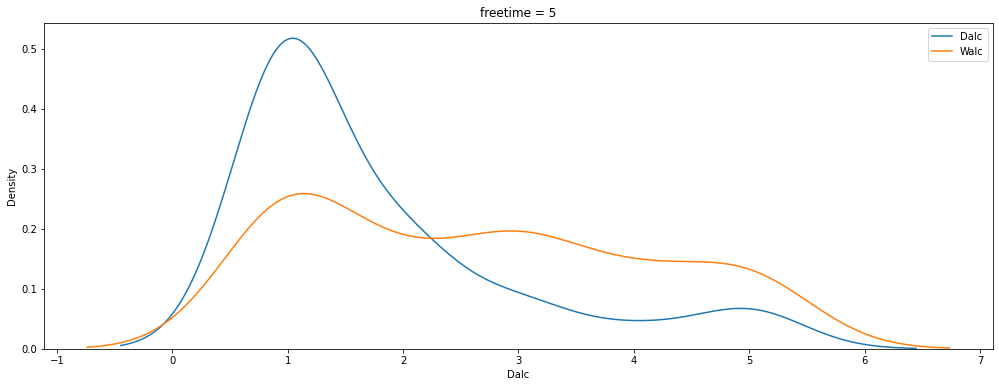

In [66]:
plt.figure(figsize=(17, 6))
sns.kdeplot(data[data['freetime'] == 5]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data[data['freetime'] == 5]['Walc'], x = 'Walc', label = 'Walc')
plt.title("freetime = 5")
plt.legend(loc='best')
plt.show()

**Вывод:**
* По boxplot и среднему значению можно сказать, что чем больше свободного времени, тем больше человек пьет, причем начинают больше пить в выходные дни
* Так же можно заметить, что большинство людей пьют очень мало в независимости от количества свободного времени.
* Видимо, алкоголь не является главным развлечением у школьников, если у них много свободного времени (плотность не так высока, по сравнению с теми, кто свободен и не пьет, хотя это может быть от недостатка данных, но хочется верить в лучше:) )

#### Cвязь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).

In [67]:
#создадим новый столбец, где будет данные об образовании опекуна
data['Gedu_1'] = 'other' 
data.loc[data['guardian'] == 'mother', 'Gedu_1'] = data['Medu']
data.loc[data['guardian'] == 'father', 'Gedu_1'] = data['Fedu']
#передвинем новый столбец к Fedu и Medu ближе
data.insert(loc = 10, column = 'Gedu', value = data['Gedu_1'])
data = data.drop(['Gedu_1'], axis = 1)

In [68]:
#уберем other, так как там нет смысла смотреть (опекун не известен)
data_edu_gua = data[data['Gedu'] != 'other']

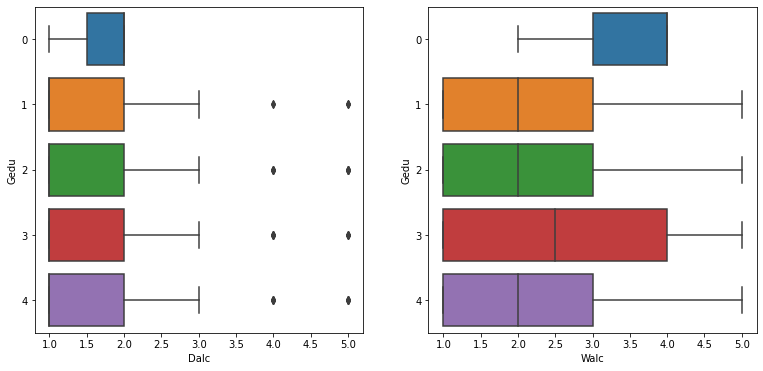

In [69]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y="Gedu", x="Dalc", data=data_edu_gua, orient="h")
plt.subplot(1, 3, 2)
sns.boxplot(y="Gedu", x="Walc", data=data_edu_gua, orient="h")
plt.show()

In [70]:
data_edu_gua.groupby(['Gedu'])[['Dalc', 'Walc']].mean()

,Dalc,Walc
Gedu,,
0,1.666667,3.333333
1,1.460606,2.387879
2,1.435424,2.147601
3,1.536697,2.463303
4,1.487365,2.249097


In [71]:
data_edu_gua['Gedu'].value_counts() #не будем рассматривать Gedu = 0 из-за малого количества данных

4    277
2    271
3    218
1    165
0      3
Name: Gedu, dtype: int64

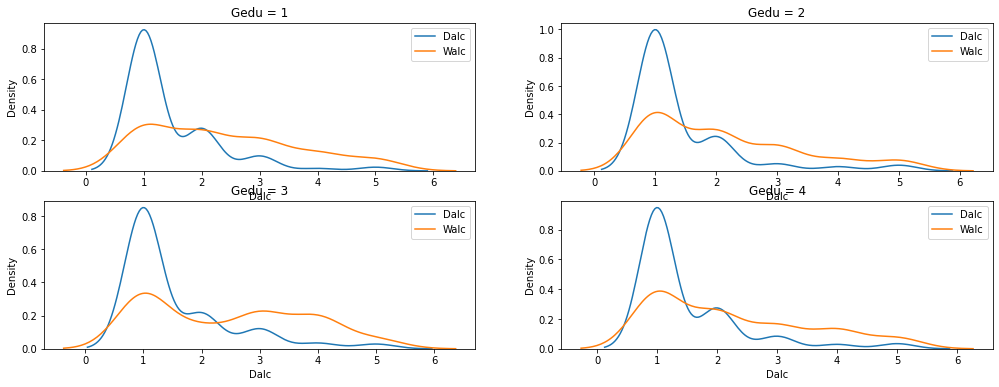

In [72]:
plt.figure(figsize=(17, 6))
plt.subplot(2, 2, 1)
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 1]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 1]['Walc'], x = 'Walc', label = 'Walc')
plt.title("Gedu = 1")
plt.legend(loc='best')
plt.subplot(2, 2, 2)
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 2]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 2]['Walc'], x = 'Walc', label = 'Walc')
plt.title("Gedu = 2")
plt.legend(loc='best')

plt.subplot(2, 2, 3)
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 3]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 3]['Walc'], x = 'Walc', label = 'Walc')
plt.title("Gedu = 3")
plt.legend(loc='best')
plt.subplot(2, 2, 4)
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 4]['Dalc'], x = 'Dalc', label = 'Dalc')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 4]['Walc'], x = 'Walc', label = 'Walc')
plt.title("Gedu = 4")
plt.legend(loc='best')
plt.show()

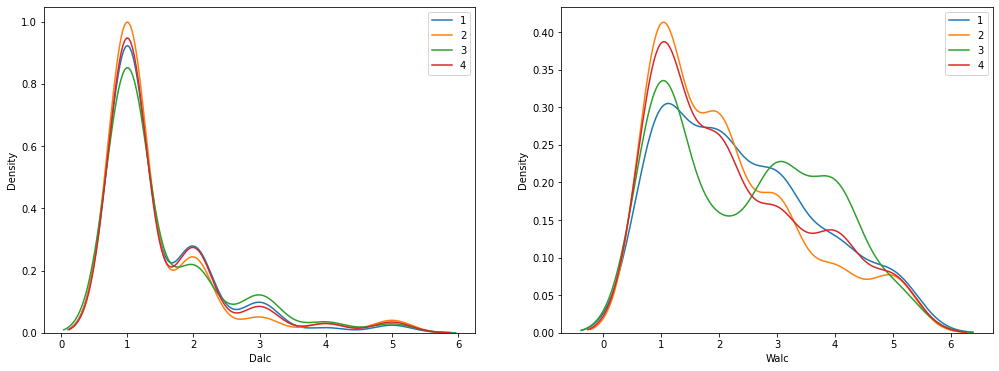

In [73]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 1]['Dalc'], x = 'Dalc', label = '1')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 2]['Dalc'], x = 'Dalc', label = '2')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 3]['Dalc'], x = 'Dalc', label = '3')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 4]['Dalc'], x = 'Dalc', label = '4')
plt.legend(loc='best')
plt.subplot(1, 2, 2)
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 1]['Walc'], x = 'Walc', label = '1')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 2]['Walc'], x = 'Walc', label = '2')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 3]['Walc'], x = 'Walc', label = '3')
sns.kdeplot(data_edu_gua[data_edu_gua['Gedu'] == 4]['Walc'], x = 'Walc', label = '4')
plt.legend(loc='best')
plt.show()

**Вывод:**
* Распределение употребляемого алкоголя в будние дни практически не зависит от образования опекуна (график плотности слабо изменяется)
* Самый высокие процент очень мало пьющих в выходные среди тех, чьи опекун имеет образование 2 и 4 (до 9 класса и высшее).
* Самый большой процент пьющих больше чем нормально в выходной среди тех, у кого опекун имеет образование 3 (полное среднее) 
* **Мораль -** если у опекуна низкое образование, это не значит, что ребенок будет спиваться.

#### Употребление алкоголя для 50 лучших учеников и 50 худших (по G3). Выполните сравнение отдельно для каждого предмета (Math и Por).

In [74]:
data_best_gen = data.nlargest(50, 'G3')
data_best_math = data[data['Subject'] == 'Math'].nlargest(50, 'G3')
data_best_por = data[data['Subject'] == 'Por'].nlargest(50, 'G3')
data_worst_gen = data.nsmallest(50, 'G3')
data_worst_math = data[data['Subject'] == 'Math'].nsmallest(50, 'G3')
data_worst_por = data[data['Subject'] == 'Por'].nsmallest(50, 'G3')

#### Распределение алкоголя для отличников

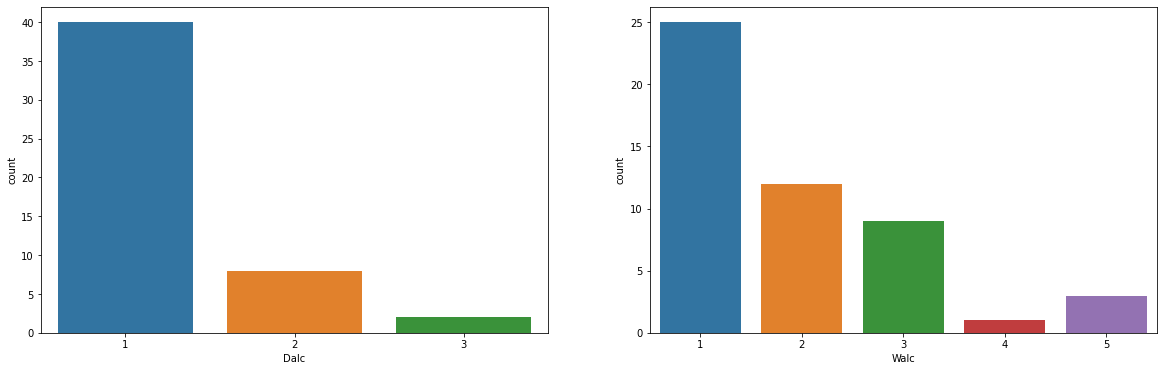

In [75]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data = data_best_gen, x = 'Dalc')
plt.subplot(1, 2, 2)
sns.countplot(data = data_best_gen, x = 'Walc')
plt.show()

In [76]:
data_best_gen[['Dalc', 'Walc']].mean()

Dalc    1.24
Walc    1.90
dtype: float64

#### Распределение алкоголя для двоечников

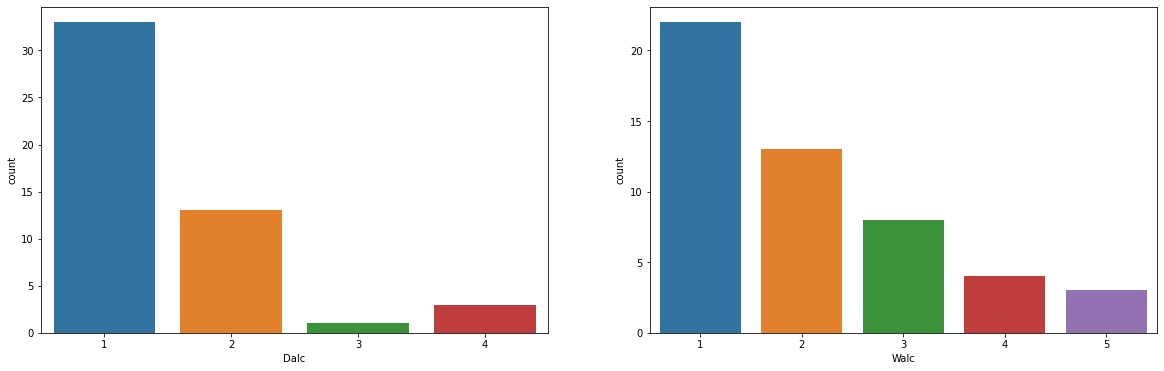

In [77]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data = data_worst_gen, x = 'Dalc')
plt.subplot(1, 2, 2)
sns.countplot(data = data_worst_gen, x = 'Walc')
plt.show()

In [78]:
data_worst_gen[['Dalc', 'Walc']].mean()

Dalc    1.48
Walc    2.06
dtype: float64

**Вывод:** 
* Двоечники больше пьют и в выходные и в будни дни (видно по среднему значению и по countplot в целом)
* Непьющих отличников куда больше, чем непьющих двоечников
* Что интересно, количество очень много пьющих в выходные отличников примерно равно количество пьющих очень много в выходные двоечников (по выходным собираются и учат уроки :) )

#### Распределение для алкоголя лучших по математике

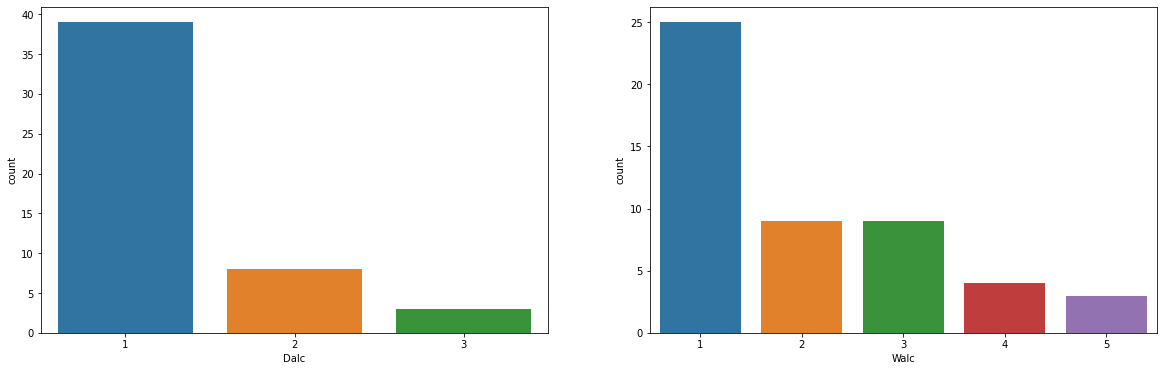

In [79]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data = data_best_math, x = 'Dalc')
plt.subplot(1, 2, 2)
sns.countplot(data = data_best_math, x = 'Walc')
plt.show()

In [80]:
data_best_math[['Dalc', 'Walc']].mean()

Dalc    1.28
Walc    2.02
dtype: float64

#### Распределение для алкоголя худших математиков

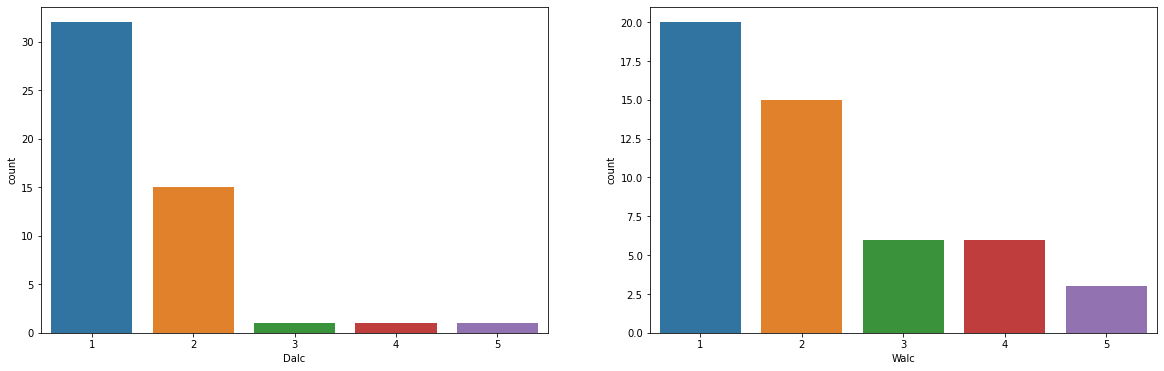

In [81]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data = data_worst_math, x = 'Dalc')
plt.subplot(1, 2, 2)
sns.countplot(data = data_worst_math, x = 'Walc')
plt.show()

In [82]:
data_worst_math[['Dalc', 'Walc']].mean()

Dalc    1.48
Walc    2.14
dtype: float64

**Вывод:**
* Очень мало пьющих отличников по математики больше, чем очен  мало пьющих двоечников по математике
* Многие отличники по математике очень много, много и умеренно пьют в выходные (возможно даже столько же сколько довечники, если не больше)

#### Распределение алкоголя для лучших по языку

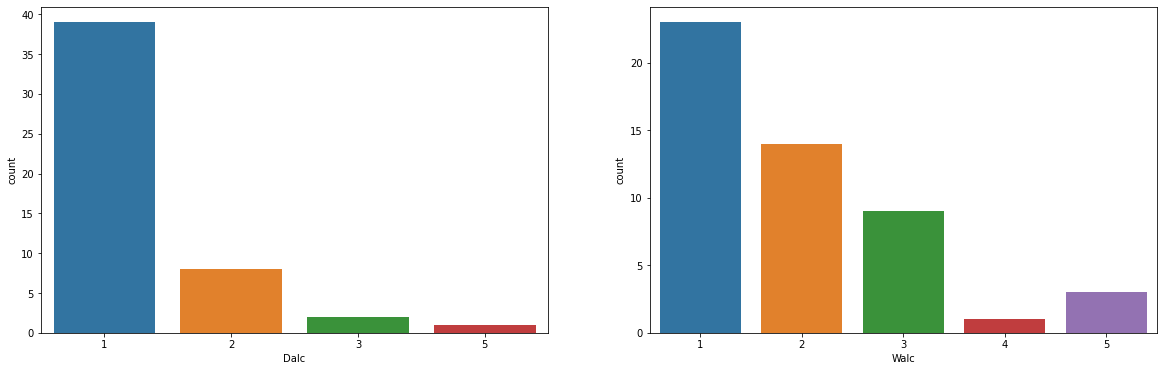

In [83]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data = data_best_por, x = 'Dalc')
plt.subplot(1, 2, 2)
sns.countplot(data = data_best_por, x = 'Walc')
plt.show()

In [84]:
data_best_por[['Dalc', 'Walc']].mean()

Dalc    1.32
Walc    1.94
dtype: float64

#### Распределение алкоголя для худших по языку

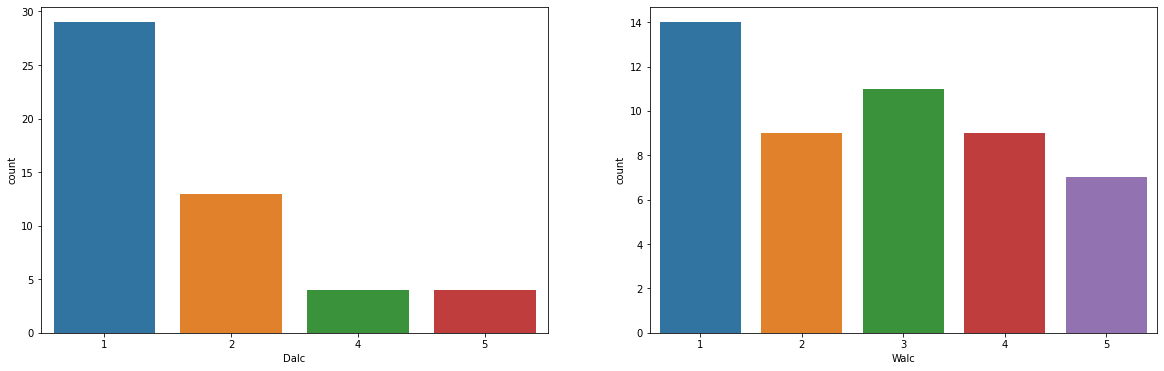

In [85]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data = data_worst_por, x = 'Dalc')
plt.subplot(1, 2, 2)
sns.countplot(data = data_worst_por, x = 'Walc')
plt.show()

In [86]:
data_worst_por[['Dalc', 'Walc']].mean()

Dalc    1.82
Walc    2.72
dtype: float64

**Вывод:**
* Двоечники по языку пьют в выходные и в будни на много больше, чем отличники.
* Однако количество пьющих умеренно в выходные примерно одинакооей


**Общий вывод:**
* Отличники по языку чуть больше пьют, чем отличники по математике
* Не пьющих отличников по математики чуть больше, чем не пьющих отличников по языку
* Двоечники по языку пьют больше, чем двоечники по математике
* В целом, математики пьют меньше, чем студенты, изучающие язык

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

#### В некоторых пунктах я решил разбить еще по Subject, так как посчитал это интересным 

### Пол

In [87]:
data.groupby(['sex'])[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
sex,,,
F,11.256637,11.295575,11.421239
M,11.125285,11.150342,11.193622


Видно, что средняя оценка у женщин немного больше, но разница не очень серьезная

In [88]:
data.groupby(['Subject', 'sex'])[['G1', 'G2', 'G3']].mean()

G1         G2         G3
Subject sex                                 
Math    F    10.595000  10.365000   9.910000
        M    11.205556  11.038889  10.855556
Por     F    11.619178  11.805479  12.249315
        M    11.069498  11.227799  11.428571

Видно, что оценки у девочек выше по португальскому, а у мальчиков по математике

### Время в пути от дома до школы

In [89]:
# traveltime - Время в пути от дома до школы: 1 - < 15 мин, 2 - от 15 до 30 мин, 3 - от 30 мин до 1 часа, 4 - > 1 часа
data.groupby(['traveltime'])[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
traveltime,,,
1,11.501667,11.576667,11.666667
2,10.849673,10.918301,10.928105
3,10.621622,10.378378,10.527027
4,9.875000,9.250000,10.166667


Видно, чем больше добираются до школы, тем нижне средняя оценка

### Наличие дополнительной помощи в учебе (от членов семьи или вообще)

In [90]:
data.groupby(['famsup'])[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
famsup,,,
no,11.236641,11.251908,11.244275
yes,11.175123,11.219313,11.371522


Серьезной зависимости между наличием помощи и оценкой нет (разве что в G1 и G2, но это всего 0,1), а вот если разбить по предметам... (см.ниже)

In [91]:
data.groupby(['Subject', 'famsup'])[['G1', 'G2', 'G3']].mean()

G1         G2         G3
Subject famsup                                 
Math    no      11.182432  10.932432  10.547297
        yes     10.693966  10.525862  10.237069
Por     no      11.269388  11.444898  11.665306
        yes     11.469657  11.643799  12.065963

Видно, что если члены семьи помогают по математике, оценки становятся хуже, а если помогают по языку, то лучше. (видимо по математике могут обмануть, а язык все таки это общение)

### Посещение платных дополнительных занятий

In [92]:
data.groupby(['paid'])[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
paid,,,
no,11.259823,11.258555,11.425856
yes,10.976744,11.134884,10.939535


Видно, что если нет платных занятий, то оценки лучше. (видимо ходили к шарлатанам :) )

In [93]:
data.groupby(['Subject','paid'])[['G1', 'G2', 'G3']].mean()

G1         G2         G3
Subject paid                                 
Math    no    10.754902  10.303922   9.906863
        yes   11.034091  11.125000  10.880682
Por     no    11.435897  11.591453  11.955556
        yes   10.717949  11.179487  11.205128

Если разбить по предметам, то ситуация противоположна ситуации с famsup: если посещать платные занятия по математике, то оценки лучше, а если посещать по языку, то хуже. (Может репетиторы иностранных языков шарлатаны :) )

### Наличие интернета

In [94]:
data.groupby(['internet'])[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
internet,,,
no,10.57619,10.395238,10.457143
yes,11.36398,11.453401,11.550378


Если нет интернета, то и оценки хуже. Это вполне логично, так как если чего-то не знаешь, нет возможности загуглить (или найти решение :) )

### Наличие романтических отношений

In [95]:
data.groupby(['romantic'])[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
romantic,,,
no,11.332288,11.482759,11.622257
yes,10.967213,10.795082,10.797814


Если состоишь в романтических отношениях, то и оценки хуже. Логично, так как вместо учебы идут гулять с деффками

### Употребление алкоголя

In [96]:
data.groupby(['Dalc'])[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
Dalc,,,
1,11.466284,11.506456,11.671449
2,10.810526,10.752632,10.573684
3,10.530303,10.727273,10.954545
4,9.884615,9.576923,9.269231
5,9.840000,10.280000,10.360000


In [97]:
data.groupby(['Walc'])[['G1', 'G2', 'G3']].mean()

,G1,G2,G3
Walc,,,
1,11.467363,11.550914,11.676240
2,11.575221,11.420354,11.477876
3,11.183246,11.308901,11.366492
4,10.348485,10.325758,10.469697
5,10.194444,10.402778,10.388889


In [98]:
data.groupby(['Dalc', 'Walc'])[['G1', 'G2', 'G3']].mean()

G1         G2         G3
Dalc Walc                                 
1    1     11.478723  11.561170  11.702128
     2     11.784884  11.622093  11.825581
     3     11.158416  11.534653  11.544554
     4     10.974359  10.641026  11.153846
     5     10.444444  10.444444  11.111111
2    1      9.750000  10.000000   8.500000
     2     10.959184  10.877551  10.571429
     3     11.550725  11.478261  11.550725
     4      9.839286   9.732143   9.678571
     5     10.833333  11.083333   9.833333
3    1     18.000000  18.000000  18.000000
     2     11.000000  11.000000  10.500000
     3     10.437500  10.062500  10.500000
     4     10.482759  10.896552  11.172414
     5     10.222222  10.611111  10.666667
4    1      7.000000   8.000000   9.000000
     2     10.500000   8.500000   5.500000
     3      9.000000   8.400000   8.000000
     4     10.375000  10.875000  10.125000
     5     10.100000   9.500000  10.000000
5    1     12.000000  11.000000  11.000000
     2      9.000000  10.000000  10.000000
     5      9.782609  10.260870  10.347826

Некоторые строки здесь буду игнорировать, так как в них слишком мало значение (от 1 до 5)

In [99]:
data.groupby(['Dalc', 'Walc'])[['ID']].count()

ID
Dalc Walc     
1    1     376
     2     172
     3     101
     4      39
     5       9
2    1       4
     2      49
     3      69
     4      56
     5      12
3    1       1
     2       2
     3      16
     4      29
     5      18
4    1       1
     2       2
     3       5
     4       8
     5      10
5    1       1
     2       1
     5      23

Трудно судить, так как абсолютное большинство студентов пьют очень мало и в будни и в выходные, но все же (все отсылки к таблице на одну выше) **вывод:**

* Оценки не сильно снижаются с употреблением алкоголя в умеренном количестве. Например, в строке 3.3 итоговая средняя 10,5, а в строке 5.5 10,3 (всего 0,2) 
* Самая высокая оценка у студентов, пьющая очень мало в будни и мало в выходные (Dalc 1, Walc 2)
* Стоит отметить все же, что если в будни пить очень мало, а в выходные просто мало, то средняя оенка будет самая высокая
* Очент странно, но самый низкий балл у тех, что пьет мало в будни и много в выходные (строка 2.4)
* Если грамотно распределить алкоголь, то успеваемость может увеличиться. Например, в строке 2.4 средняя оценка 9,7, а в строке 3.3 10,5 или в строке 1.5 средняя оценка 11,1, а в 2.3 11,5
* **Мораль -** пейте не много(хотя бы в будни), а то оценки будут падать.

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [100]:
# добавляем новый столбец
data['G4'] = 1
data.loc[(18 <= data['G3']) & (data['G3'] <= 20), 'G4'] = 4
data.loc[(14 <= data['G3']) & (data['G3'] <= 17), 'G4'] = 3
data.loc[(8 <= data['G3']) & (data['G3'] <= 13), 'G4'] = 2

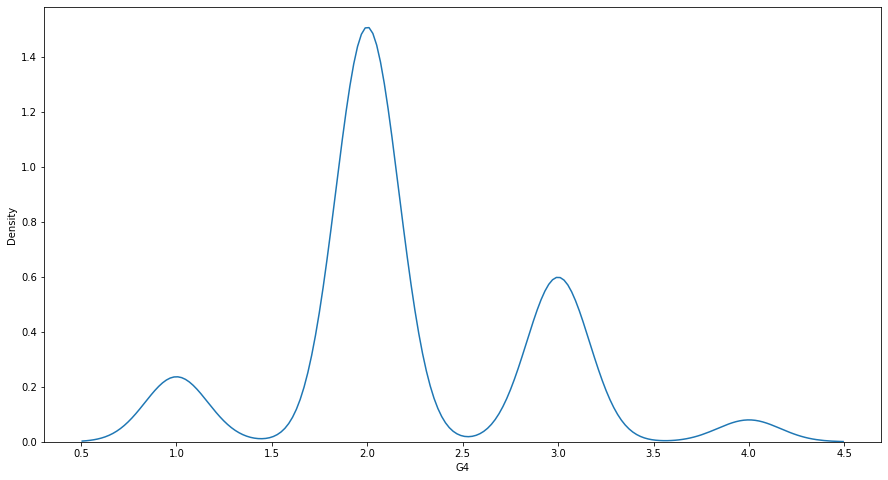

In [101]:
plt.figure(figsize=(15, 8))
sns.kdeplot(data=data, x="G4", label = 'G4')
plt.show()

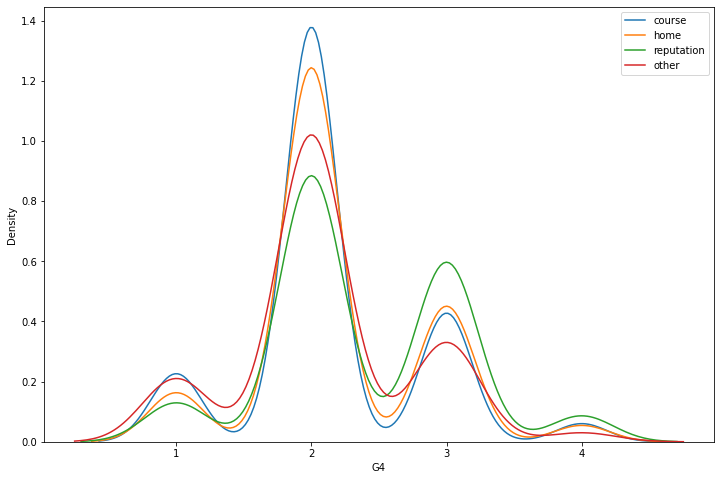

In [102]:
plt.figure(figsize=(12, 8))
for val in data['reason'].unique():
    sns.kdeplot(data=data[data['reason'] == val], x="G4", label = val)
plt.legend(loc='best')
plt.show()

Выводы:
    
* у тех, кто выбирал школу по course, больше вероятность получить 1 и 2(неудовл и удовл)
* зависимость home и course примерно одинаковая (немного отличается у оценки 1 и 2)
* выбирая по reputation, самый высокий шанс получить 3 и 4 (хорошо и отлично) и самый низкий шанс получить 1 и 2, чем среди других reason
* оценку 4 меньше всего получали люди, выбирающие по other

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

Посмотрев задание 6 (таблица корреляций), можно заметить, что с оценками лучше всего коррелируется studytime, failures, Dalc, traveltime (можно еще взять Dalc, и age, но мне кажется они не так сильно влияют на оценку)

Что-то круче, к сожалению, придумать не смог. Так как большинство ученков имеют оценку 2 (легко проверяется через value_counts), то, думаю, имеет смысл создать новый столбец G4_pred и все строки забить значением 2. Чтобы определить оценку 1, 3 и 4, строил много таблиц и графиков, который удалил, ибо они бы заняли очень много места, но их выводы я написал ниже.

(Возможно traveltime бесполезен, с ним точность была довольно низка)

#### Для G4 = 4:
* всего 33
* фейлы < 0 
* время учебы 3 или 4
* время в пути не больше 2
* Walc = 1 

#### Для G4 = 3
* всего 248
* фейлов почти нет (4 человека с фейлами 1 и 2)
* время учебы в основном 3
* время до школы от 1 до 2
* Walc < 4

#### Для G4 = 1 
* всего 98
* studytime не больше 2
* traveltime 1 и 2
* Walc >3

In [103]:
data['G4_pred'] = 2
data.loc[(data['failures'] < 4) & (data['studytime'] < 2) & (data['traveltime'] <= 2) & (data['Walc'] > 3), 'G4_pred'] = 1
data.loc[(data['failures'] < 1) & (data['studytime'] == 3) & (data['traveltime'] < 3) & (data['Walc'] < 4), 'G4_pred'] = 3
data.loc[(data['failures'] < 1) & (data['studytime'] > 2) & (data['traveltime'] < 2) & (data['Walc'] == 1), 'G4_pred'] = 4

In [104]:
data[data['G4_pred'] == data['G4']].shape[0]

556

In [105]:
print('Точность равна', data[data['G4_pred'] == data['G4']].shape[0]*100/len(data), '%' )

Точность равна 55.37848605577689 %


### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

**look** Некоторые дополнитльные исследования (дополнительные графики и соответствующие выводы) делал в заданиях выше (задание 9)

In [106]:
# your code here